In [1]:
import pandas as pd

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt  # para gerar gráficos
import seaborn as sns            # graficos mais complexos

In [3]:
training_file= pd.read_csv('poker-hand-training.data')
teste_file =pd.read_csv('poker-hand-testing.data')

#test_file=teste_file.values.tolist()

In [4]:
teste_file["CLASS"].value_counts()

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: CLASS, dtype: int64

In [11]:
training_file["CLASS"].value_counts()
print(len(teste_file)+)

1000000


In [12]:
teste_file.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


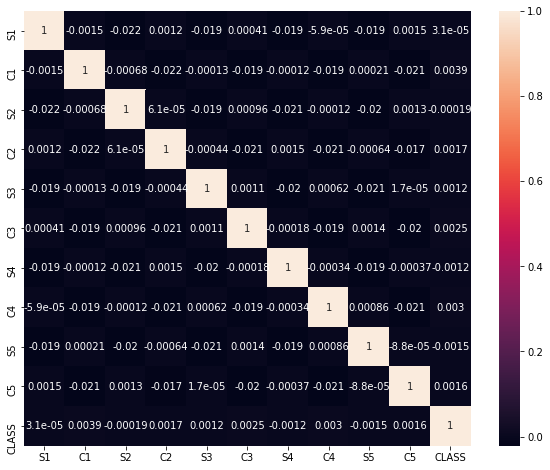

In [10]:
correlacao=teste_file.corr()
fig, ax = plt.subplots(figsize=(10, 8))
training_file.columns = training_file.columns.str.upper()

sns.heatmap(correlacao, annot=True)

In [7]:
df0=training_file[training_file["CLASS"]==0]

In [8]:
teste_file["CLASS"].value_counts()

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: CLASS, dtype: int64

In [9]:
training_file["CLASS"].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: CLASS, dtype: int64

In [59]:
df1=training_file[training_file["CLASS"]==1]

In [60]:
df2=training_file[training_file["CLASS"]==2]

In [61]:
df3=training_file[training_file["CLASS"]==3]

In [62]:
df4=training_file[training_file["CLASS"]==4]

In [63]:
df5=training_file[training_file["CLASS"]==5]

In [64]:
df6=training_file[training_file["CLASS"]==6]

In [65]:
df7=training_file[training_file["CLASS"]==7]

In [66]:
df8=training_file[training_file["CLASS"]==8]

In [67]:
df9=training_file[training_file["CLASS"]==9]

In [68]:
sumarizado={}
df0list=df0.values.tolist()
sumarizado[0]=df0list
df1list=df1.values.tolist()
sumarizado[1]=df1list
df2list=df2.values.tolist()
sumarizado[2]=df2list
df3list=df3.values.tolist()
sumarizado[3]=df3list
df4list=df4.values.tolist()
sumarizado[4]=df4list
df5list=df5.values.tolist()
sumarizado[5]=df5list
df6list=df6.values.tolist()
sumarizado[6]=df6list
df7list=df7.values.tolist()
sumarizado[7]=df7list
df8list=df8.values.tolist()
sumarizado[8]=df8list
df9list=df9.values.tolist()
sumarizado[9]=df9list

In [69]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 #Desvio padrão

In [70]:
def stdev(numbers): 
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)


In [71]:
def summarize(dataset):
   
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
  
    return summaries

In [72]:
def summarizeByClass(dataset):
	separated = dataset
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	
	
	return summaries

In [73]:
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [74]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        chance= 1
        for i in range(len(classSummaries)):
            
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            chance *= calculateProbability(x, mean, stdev)
        
            chance=np.log(chance)
        probabilities[classValue] =chance
    return probabilities

In [75]:
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	
	return bestLabel

In [76]:
def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions


In [77]:
def getAccuracy(testSet, predictions):
    correct = 0
    valorA=0
    valorB=0
    status=-1
    situacao=-1
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct+=1
    # print(correct,"\n")
	#Buscando qual a classe teve o maior acerto, acredito que estou no caminho certo, agora e fazer o teste final 
    accuracy=(correct/float(len(testSet)))* 100.0
    return accuracy

In [78]:
def main():
# 	filename = 'diabetes.csv'
# 	splitRatio = 0.67
# 	status=-1
# 	situacao=-1
    dataset = training_file
# 	trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(training_file)+len(test_file), len(training_file), len(test_file)))
    #prepare model
    summaries = summarizeByClass(sumarizado)
    # test model
    predictions = getPredictions(summaries, test_file)
    accuracy= getAccuracy(test_file, predictions)
    print('Accuracy: {0}%'.format(accuracy))
   
main()

Split 1025010 rows into train=25010 and test=1000000 rows
C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
501209 

Accuracy: 50.1209%
